In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import csv
%matplotlib inline
import seaborn as sns
import numpy as np

### Scrape the data

In [2]:
url = 'https://www.topendsports.com/events/summer/science/athletics-100m.htm'
r = requests.get(url)
print(r.content[:100])

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml"  xml:lang="en" lang="en" dir="ltr">\n<head'


In [3]:
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
csv_file = open('runners_data.csv', 'w', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['year', 'winner', 'time', 'height', 'weight', 'bmi'])

36

In [9]:
rows = soup.select('tr')
#we dont select the first row because its the headers row
for row in rows[1:]:
    year = row.select_one('td').text
    winner = row.select_one('td:nth-child(2)').text.strip()
    time = row.select_one('td:nth-child(3)').text.strip()
    height = row.select_one('td:nth-child(4)').text.strip()
    weight = row.select_one('td:nth-child(5)').text.strip()
    bmi = row.select_one('td:last-child').text.strip()
    
    csv_writer.writerow([year, winner, time, height, weight, bmi])
    
csv_file.close()

### Load data and analyze

In [2]:
data = pd.read_csv('runners_data.csv')

In [4]:
data.head()

,year,winner,time,height,weight,bmi
0,1896,Tom Burke (USA),12.0,1.83 m / 6 ft 0 in,66 kg / 146 lb,19.7
1,1900,Frank Jarvis (USA),11.0,1.67 m / 5 ft 5 1⁄2 in,58 kg / 128 lb,20.8
2,1904,Archie Hahn (USA),11.0,1.67 m / 5 ft 5 1⁄2 in,64 kg / 141 lb,22.9
3,1908,Reggie Walker (SAF),10.8,1.70 m / 5 ft 6 1⁄2 in,61 kg / 134 lb,21.1
4,1912,Ralph Craig (USA),10.8,1.82 m / 6 ft 0 in,73 kg / 161 lb,22.0


#### clean data, get country of winner and place them in new column

In [3]:
data['country'] = data['winner'].str.extract(r"\(([a-zA-Z]+)\)")
data['winner'] = data['winner'].str.replace(r"\(([a-zA-Z]+)\)", "")

In [4]:
data.head()

,year,winner,time,height,weight,bmi,country
0,1896,Tom Burke,12.0,1.83 m / 6 ft 0 in,66 kg / 146 lb,19.7,USA
1,1900,Frank Jarvis,11.0,1.67 m / 5 ft 5 1⁄2 in,58 kg / 128 lb,20.8,USA
2,1904,Archie Hahn,11.0,1.67 m / 5 ft 5 1⁄2 in,64 kg / 141 lb,22.9,USA
3,1908,Reggie Walker,10.8,1.70 m / 5 ft 6 1⁄2 in,61 kg / 134 lb,21.1,SAF
4,1912,Ralph Craig,10.8,1.82 m / 6 ft 0 in,73 kg / 161 lb,22.0,USA


####  remove inches and lb from data

In [5]:
data['height'] = data['height'].str.replace(r"(m.+)", "")
data['weight'] = data['weight'].str.replace(r"(kg.+)", "")

In [6]:
data

,year,winner,time,height,weight,bmi,country
0,1896,Tom Burke,12.00,1.83,66,19.7,USA
1,1900,Frank Jarvis,11.00,1.67,58,20.8,USA
2,1904,Archie Hahn,11.00,1.67,64,22.9,USA
3,1908,Reggie Walker,10.80,1.70,61,21.1,SAF
4,1912,Ralph Craig,10.80,1.82,73,22.0,USA
5,1920,Charles Paddock,10.80,1.71,75,25.6,USA
6,1924,Harold Abrahams,10.60,1.83,75,22.4,GBR
7,1928,Percy Williams,10.80,1.70,56,19.4,CAN
8,1932,Eddie Tolan,10.38,1.70,65,22.5,USA
9,1936,Jesse Owens,10.30,1.80,75,23.1,USA


In [7]:
data['speed'] = round(100 / data['time'], 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     28 non-null     int64  
 1   winner   28 non-null     object 
 2   time     28 non-null     float64
 3   height   28 non-null     object 
 4   weight   28 non-null     object 
 5   bmi      28 non-null     float64
 6   country  28 non-null     object 
 7   speed    28 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.9+ KB


In [9]:
data['height'] = data['height'].astype('float')
data['weight'] = data['weight'].astype('float')

In [10]:
data.dtypes

year         int64
winner      object
time       float64
height     float64
weight     float64
bmi        float64
country     object
speed      float64
dtype: object

In [11]:
data['time'].describe()

count    28.000000
mean     10.315714
std       0.521177
min       9.630000
25%       9.942500
50%      10.225000
75%      10.650000
max      12.000000
Name: time, dtype: float64

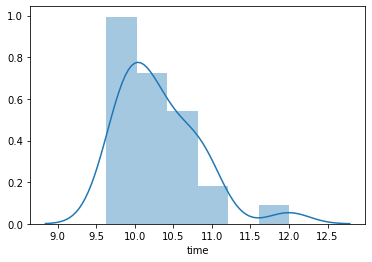

In [12]:
sns.distplot(data['time'])

from the distribution of the data, it seems that we have positive skewness, and possibly outliers in 11.5 - 12.5 range of time

In [14]:
print(f"Kurtosis: {data['time'].kurt()}")
print(f"skewness: {data['time'].skew()}")

Kurtosis: 2.5153222632018304
skewness: 1.3139215198061585


since skewness is not 0, we can conclude that the distribution of our data is not symetric, or not normal. its also skewed to the right, because skewness is positive.
kurtosis shows that there is a 'heavy' tail in the graph, or presence of outliers, since its != 0

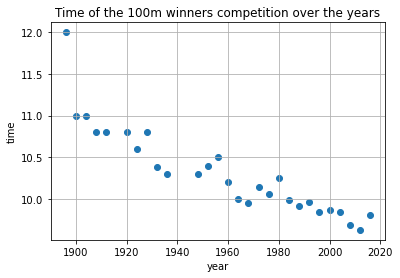

In [67]:
plt.scatter(x=data['year'], y=data['time'])
plt.ylabel('time')
plt.xlabel('year')
plt.title('Time of the 100m winners competition over the years')
plt.grid()

from the few data that we could gather, its clear that there is a negative linear trend between the year and mark of the 100m winners from 1896 to 2016.
over the years its apparent that the winners have gotten faster, 
we can also see the presence of potential a potential outlier at mark of 12s, however we will keep it because it seems that it tends to follow the trend. As we can appreciate below, the correlation of the variables is strong.

In [13]:
data['year'].corr(data['time'])

-0.9051728915966866

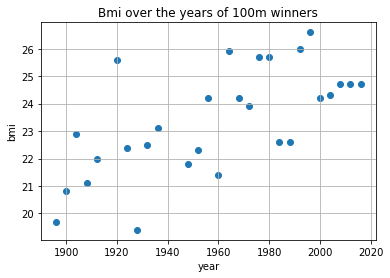

In [69]:
plt.scatter(x=data['year'], y=data['bmi'])
plt.ylabel('bmi')
plt.xlabel('year')
plt.title('Bmi over the years of 100m winners')
plt.grid()

In [15]:
data['year'].corr(data['bmi'])

0.6539790514411299

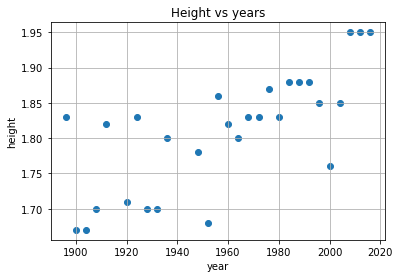

In [70]:
plt.scatter(x=data['year'], y=data['height'])
plt.ylabel('height')
plt.xlabel('year')
plt.title('Height vs years')
plt.grid()

In [17]:
data['year'].corr(data['height'])

0.7343323716429995

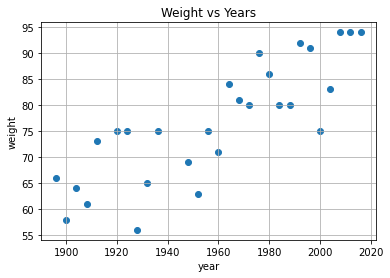

In [71]:
plt.scatter(x=data['year'], y=data['weight'])
plt.ylabel('weight')
plt.xlabel('year')
plt.title('Weight vs Years')
plt.grid()

In [19]:
data['year'].corr(data['weight'])

0.8278312823761599

ideally, we would want our dataset to be larger so it follows the normal distribution, but we considered it normal anyway for simplicity's sake. in this ideal world, we can conclude that over the years the winners from the 100m men have gotten faster, heavier and taller. 
maybe taller people are faster because their step is bigger, and their increase in weight could be because they developed more muscle, and thus are able to produce great force without expending too much energy, meaning they can run faster.

### Linear regression and gradient descent

Since there is a strong correlation between mark time and the years, we will use gradient descent and linear regression to fit the best line to the data

In [39]:
X = np.array(data['year'])
y = np.array(data['time'])
m = y.size

In [21]:
def plotData(x, y):
    fig = plt.figure()
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Mark in seconds')
    plt.xlabel('years')
    plt.grid()


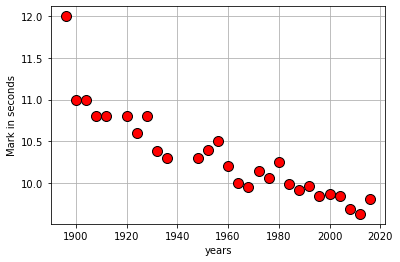

In [22]:
plotData(X,y)

In [40]:
X = np.stack([np.ones(m), X], axis=1)

In [41]:
X_norm = X.copy()
X_norm[:, 1] = (X_norm[:, 1] - X_norm[:, 1].mean()) / X_norm[:, 1].std()
X_norm

array([[ 1.        , -1.7055355 ],
       [ 1.        , -1.59625634],
       [ 1.        , -1.48697718],
       [ 1.        , -1.37769801],
       [ 1.        , -1.26841885],
       [ 1.        , -1.04986053],
       [ 1.        , -0.94058136],
       [ 1.        , -0.8313022 ],
       [ 1.        , -0.72202304],
       [ 1.        , -0.61274388],
       [ 1.        , -0.28490639],
       [ 1.        , -0.17562723],
       [ 1.        , -0.06634806],
       [ 1.        ,  0.0429311 ],
       [ 1.        ,  0.15221026],
       [ 1.        ,  0.26148942],
       [ 1.        ,  0.37076859],
       [ 1.        ,  0.48004775],
       [ 1.        ,  0.58932691],
       [ 1.        ,  0.69860608],
       [ 1.        ,  0.80788524],
       [ 1.        ,  0.9171644 ],
       [ 1.        ,  1.02644356],
       [ 1.        ,  1.13572273],
       [ 1.        ,  1.24500189],
       [ 1.        ,  1.35428105],
       [ 1.        ,  1.46356021],
       [ 1.        ,  1.57283938]])

In [42]:
def computeCost(x, y, theta):
    m = y.size
    J =np.power(np.dot(x, theta) - y, 2) / (2 * m)
    J = np.sum(J)
    return J

In [43]:
J = computeCost(X_norm, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 53.34


In [44]:
def gradientDescent(x, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for i in range(iterations):
        theta = theta - np.dot(x.T, np.dot(x, theta) - y) * alpha / m
        theta_history[i, :] = theta.T
        J_history[i] = computeCost(x, y, theta)
    return theta, J_history

In [45]:
theta = np.zeros(2)
iterations = 1500
alpha = 0.03

theta, J_history = gradientDescent(X_norm ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 10.3157, -0.4633


In [46]:
print(J_history)

[5.01870687e+01 4.72224113e+01 4.44329651e+01 ... 2.36599058e-02
 2.36599058e-02 2.36599058e-02]


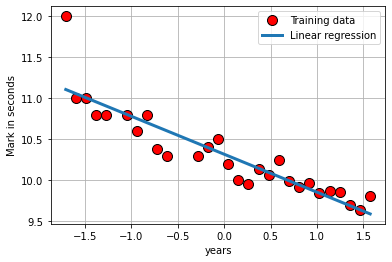

In [65]:
plotData(X_norm[:, 1], y)
plt.plot(X_norm[:, 1], np.dot(X_norm, theta), '-', lw=3)
plt.legend(['Training data', 'Linear regression']);

#### final cost or accuracy

In [60]:
cost = computeCost(X_norm, y, theta)

In [61]:
cost

0.02365990584410639

 as appreciated above, the fit to the training data is almost perfect, since the cost asocciated is near zero.